## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [8]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2019-09-23 18:34:44--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.171.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.171.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  47.1MB/s    in 24s     

2019-09-23 18:35:08 (13.6 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [9]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batchNorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchNorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [11]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(256),
                                               RandomCrop(224),
                                     Normalize(),
                                               ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [12]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [13]:
# load training data in batches
batch_size = 10

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [14]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [15]:
# load test data in batches
batch_size = 10

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [16]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [17]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [18]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

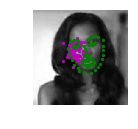

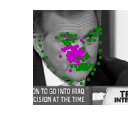

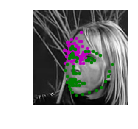

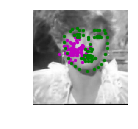

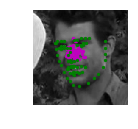

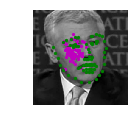

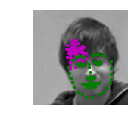

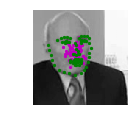

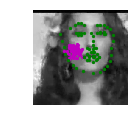

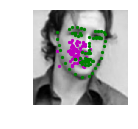

In [19]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):

    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

    plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [20]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()

## TODO: specify optimizer 
# stochastic gradient descent with a small learning rate AND some momentum
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(params = net.parameters(), lr = 0.001)



## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [21]:
def train_net(n_epochs):

    # prepare the net for training
    net.train()

    for epoch in range(n_epochs):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [22]:
# train your network
n_epochs = 10 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.444822633266449
Epoch: 1, Batch: 20, Avg. Loss: 0.22220691591501235
Epoch: 1, Batch: 30, Avg. Loss: 0.19969796985387803
Epoch: 1, Batch: 40, Avg. Loss: 0.23780691027641296
Epoch: 1, Batch: 50, Avg. Loss: 0.20274922698736192
Epoch: 1, Batch: 60, Avg. Loss: 0.20659849494695665
Epoch: 1, Batch: 70, Avg. Loss: 0.19506644010543822
Epoch: 1, Batch: 80, Avg. Loss: 0.18359782174229622
Epoch: 1, Batch: 90, Avg. Loss: 0.19148786664009093
Epoch: 1, Batch: 100, Avg. Loss: 0.19200459867715836
Epoch: 1, Batch: 110, Avg. Loss: 0.17891960442066193
Epoch: 1, Batch: 120, Avg. Loss: 0.24039518907666207
Epoch: 1, Batch: 130, Avg. Loss: 0.24854721128940582
Epoch: 1, Batch: 140, Avg. Loss: 0.17951048612594606
Epoch: 1, Batch: 150, Avg. Loss: 0.17608560845255852
Epoch: 1, Batch: 160, Avg. Loss: 0.23152586072683334
Epoch: 1, Batch: 170, Avg. Loss: 0.21394176706671714
Epoch: 1, Batch: 180, Avg. Loss: 0.19656502902507783
Epoch: 1, Batch: 190, Avg. Loss: 0.21607275903224946
Epoc

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.1683617874979973
Epoch: 2, Batch: 20, Avg. Loss: 0.2139056347310543
Epoch: 2, Batch: 30, Avg. Loss: 0.187432262301445
Epoch: 2, Batch: 40, Avg. Loss: 0.17032927870750428
Epoch: 2, Batch: 50, Avg. Loss: 0.1514568142592907
Epoch: 2, Batch: 60, Avg. Loss: 0.14337788075208663
Epoch: 2, Batch: 70, Avg. Loss: 0.19815322160720825
Epoch: 2, Batch: 80, Avg. Loss: 0.16011457443237304
Epoch: 2, Batch: 90, Avg. Loss: 0.1481495626270771
Epoch: 2, Batch: 100, Avg. Loss: 0.115742988884449
Epoch: 2, Batch: 110, Avg. Loss: 0.11848038919270039
Epoch: 2, Batch: 120, Avg. Loss: 0.12552284821867943
Epoch: 2, Batch: 130, Avg. Loss: 0.1269686698913574
Epoch: 2, Batch: 140, Avg. Loss: 0.1651539333164692
Epoch: 2, Batch: 150, Avg. Loss: 0.10084334164857864
Epoch: 2, Batch: 160, Avg. Loss: 0.12869945354759693
Epoch: 2, Batch: 170, Avg. Loss: 0.12782062143087386
Epoch: 2, Batch: 180, Avg. Loss: 0.13135656490921974
Epoch: 2, Batch: 190, Avg. Loss: 0.08849829323589802
Epoch: 2, Ba

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.07902857735753059
Epoch: 3, Batch: 20, Avg. Loss: 0.1056759886443615
Epoch: 3, Batch: 30, Avg. Loss: 0.12762166671454905
Epoch: 3, Batch: 40, Avg. Loss: 0.08523896150290966
Epoch: 3, Batch: 50, Avg. Loss: 0.07696765586733818
Epoch: 3, Batch: 60, Avg. Loss: 0.11003092788159848
Epoch: 3, Batch: 70, Avg. Loss: 0.10429871901869774
Epoch: 3, Batch: 80, Avg. Loss: 0.09334306977689266
Epoch: 3, Batch: 90, Avg. Loss: 0.07593248561024665
Epoch: 3, Batch: 100, Avg. Loss: 0.08970078825950623
Epoch: 3, Batch: 110, Avg. Loss: 0.09030197709798812
Epoch: 3, Batch: 120, Avg. Loss: 0.08030260801315307
Epoch: 3, Batch: 130, Avg. Loss: 0.12416853867471218
Epoch: 3, Batch: 140, Avg. Loss: 0.10361631289124489
Epoch: 3, Batch: 150, Avg. Loss: 0.11208356618881225
Epoch: 3, Batch: 160, Avg. Loss: 0.10175371691584587
Epoch: 3, Batch: 170, Avg. Loss: 0.078061593323946
Epoch: 3, Batch: 180, Avg. Loss: 0.14234295189380647
Epoch: 3, Batch: 190, Avg. Loss: 0.09584171846508979
Epoch

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.06630694009363651
Epoch: 4, Batch: 20, Avg. Loss: 0.10204926729202271
Epoch: 4, Batch: 30, Avg. Loss: 0.12230485640466213
Epoch: 4, Batch: 40, Avg. Loss: 0.08940998762845993
Epoch: 4, Batch: 50, Avg. Loss: 0.08113611862063408
Epoch: 4, Batch: 60, Avg. Loss: 0.07523125745356082
Epoch: 4, Batch: 70, Avg. Loss: 0.1184560090303421
Epoch: 4, Batch: 80, Avg. Loss: 0.08162606209516525
Epoch: 4, Batch: 90, Avg. Loss: 0.11564847230911254
Epoch: 4, Batch: 100, Avg. Loss: 0.09880145117640496
Epoch: 4, Batch: 110, Avg. Loss: 0.07436496131122113
Epoch: 4, Batch: 120, Avg. Loss: 0.08319982513785362
Epoch: 4, Batch: 130, Avg. Loss: 0.16621764190495014
Epoch: 4, Batch: 140, Avg. Loss: 0.07740091271698475
Epoch: 4, Batch: 150, Avg. Loss: 0.09369195550680161
Epoch: 4, Batch: 160, Avg. Loss: 0.09036576375365257
Epoch: 4, Batch: 170, Avg. Loss: 0.05527090579271317
Epoch: 4, Batch: 180, Avg. Loss: 0.09558940641582012
Epoch: 4, Batch: 190, Avg. Loss: 0.08022399991750717
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.07683281190693378
Epoch: 5, Batch: 20, Avg. Loss: 0.08151613399386406
Epoch: 5, Batch: 30, Avg. Loss: 0.07629328928887844
Epoch: 5, Batch: 40, Avg. Loss: 0.07040276192128658
Epoch: 5, Batch: 50, Avg. Loss: 0.09986217655241489
Epoch: 5, Batch: 60, Avg. Loss: 0.07164875902235508
Epoch: 5, Batch: 70, Avg. Loss: 0.07376892715692521
Epoch: 5, Batch: 80, Avg. Loss: 0.06610512025654317
Epoch: 5, Batch: 90, Avg. Loss: 0.073638666421175
Epoch: 5, Batch: 100, Avg. Loss: 0.07152072824537754
Epoch: 5, Batch: 110, Avg. Loss: 0.06713291779160499
Epoch: 5, Batch: 120, Avg. Loss: 0.07798325642943382
Epoch: 5, Batch: 130, Avg. Loss: 0.09968460202217103
Epoch: 5, Batch: 140, Avg. Loss: 0.09881910309195518
Epoch: 5, Batch: 150, Avg. Loss: 0.07431079521775245
Epoch: 5, Batch: 160, Avg. Loss: 0.09019719697535038
Epoch: 5, Batch: 170, Avg. Loss: 0.060622171685099605
Epoch: 5, Batch: 180, Avg. Loss: 0.07511686570942402
Epoch: 5, Batch: 190, Avg. Loss: 0.10255435183644294
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.1835569992661476
Epoch: 6, Batch: 20, Avg. Loss: 0.06717408075928688
Epoch: 6, Batch: 30, Avg. Loss: 0.11568723022937774
Epoch: 6, Batch: 40, Avg. Loss: 0.05343364290893078
Epoch: 6, Batch: 50, Avg. Loss: 0.046546399407088754
Epoch: 6, Batch: 60, Avg. Loss: 0.058138607442378996
Epoch: 6, Batch: 70, Avg. Loss: 0.07059456706047058
Epoch: 6, Batch: 80, Avg. Loss: 0.07803385183215142
Epoch: 6, Batch: 90, Avg. Loss: 0.074851293861866
Epoch: 6, Batch: 100, Avg. Loss: 0.10927259027957917
Epoch: 6, Batch: 110, Avg. Loss: 0.13795472979545592
Epoch: 6, Batch: 120, Avg. Loss: 0.078516386449337
Epoch: 6, Batch: 130, Avg. Loss: 0.06907629109919071
Epoch: 6, Batch: 140, Avg. Loss: 0.07073945328593254
Epoch: 6, Batch: 150, Avg. Loss: 0.10824859999120236
Epoch: 6, Batch: 160, Avg. Loss: 0.06258612237870693
Epoch: 6, Batch: 170, Avg. Loss: 0.05778339952230453
Epoch: 6, Batch: 180, Avg. Loss: 0.061812495440244676
Epoch: 6, Batch: 190, Avg. Loss: 0.06590123660862446
Epoc

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.07905541248619556
Epoch: 7, Batch: 20, Avg. Loss: 0.1001020735129714
Epoch: 7, Batch: 30, Avg. Loss: 0.08732245117425919
Epoch: 7, Batch: 40, Avg. Loss: 0.05664614699780941
Epoch: 7, Batch: 50, Avg. Loss: 0.0686492096632719
Epoch: 7, Batch: 60, Avg. Loss: 0.06918320693075657
Epoch: 7, Batch: 70, Avg. Loss: 0.2666422989219427
Epoch: 7, Batch: 80, Avg. Loss: 0.0779192116111517
Epoch: 7, Batch: 90, Avg. Loss: 0.10232698023319245
Epoch: 7, Batch: 100, Avg. Loss: 0.06538328938186169
Epoch: 7, Batch: 110, Avg. Loss: 0.06474949233233929
Epoch: 7, Batch: 120, Avg. Loss: 0.06368022561073303
Epoch: 7, Batch: 130, Avg. Loss: 0.08039230033755303
Epoch: 7, Batch: 140, Avg. Loss: 0.07914361618459224
Epoch: 7, Batch: 150, Avg. Loss: 0.06434978954494
Epoch: 7, Batch: 160, Avg. Loss: 0.06890828534960747
Epoch: 7, Batch: 170, Avg. Loss: 0.06754160076379775
Epoch: 7, Batch: 180, Avg. Loss: 0.07443505208939313
Epoch: 7, Batch: 190, Avg. Loss: 0.05946185775101185
Epoch: 7,

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.06435163635760546
Epoch: 8, Batch: 20, Avg. Loss: 0.06236052308231592
Epoch: 8, Batch: 30, Avg. Loss: 0.05757179148495197
Epoch: 8, Batch: 40, Avg. Loss: 0.05119888950139284
Epoch: 8, Batch: 50, Avg. Loss: 0.04781820178031922
Epoch: 8, Batch: 60, Avg. Loss: 0.0754975650459528
Epoch: 8, Batch: 70, Avg. Loss: 0.1239924281835556
Epoch: 8, Batch: 80, Avg. Loss: 0.05492074191570282
Epoch: 8, Batch: 90, Avg. Loss: 0.08948662485927343
Epoch: 8, Batch: 100, Avg. Loss: 0.0593807689845562
Epoch: 8, Batch: 110, Avg. Loss: 0.046014432609081266
Epoch: 8, Batch: 120, Avg. Loss: 0.05148243252187967
Epoch: 8, Batch: 130, Avg. Loss: 0.06413270458579064
Epoch: 8, Batch: 140, Avg. Loss: 0.09141922127455474
Epoch: 8, Batch: 150, Avg. Loss: 0.060275749675929545
Epoch: 8, Batch: 160, Avg. Loss: 0.06505663096904754
Epoch: 8, Batch: 170, Avg. Loss: 0.06145634464919567
Epoch: 8, Batch: 180, Avg. Loss: 0.05951820090413094
Epoch: 8, Batch: 190, Avg. Loss: 0.06171312928199768
Epo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.06731203906238079
Epoch: 9, Batch: 20, Avg. Loss: 0.05228738337755203
Epoch: 9, Batch: 30, Avg. Loss: 0.05805273726582527
Epoch: 9, Batch: 40, Avg. Loss: 0.142823738604784
Epoch: 9, Batch: 50, Avg. Loss: 0.11357894130051135
Epoch: 9, Batch: 60, Avg. Loss: 0.051524284109473226
Epoch: 9, Batch: 70, Avg. Loss: 0.05859893038868904
Epoch: 9, Batch: 80, Avg. Loss: 0.05980172455310821
Epoch: 9, Batch: 90, Avg. Loss: 0.052655726484954354
Epoch: 9, Batch: 100, Avg. Loss: 0.05864874254912138
Epoch: 9, Batch: 110, Avg. Loss: 0.05397307835519314
Epoch: 9, Batch: 120, Avg. Loss: 0.05048106461763382
Epoch: 9, Batch: 130, Avg. Loss: 0.07863984853029252
Epoch: 9, Batch: 140, Avg. Loss: 0.22360767908394336
Epoch: 9, Batch: 150, Avg. Loss: 0.08063557501882315
Epoch: 9, Batch: 160, Avg. Loss: 0.04354993253946304
Epoch: 9, Batch: 170, Avg. Loss: 0.05521312709897756
Epoch: 9, Batch: 180, Avg. Loss: 0.11922444775700569
Epoch: 9, Batch: 190, Avg. Loss: 0.05544664394110441
Ep

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.0818327847868204
Epoch: 10, Batch: 20, Avg. Loss: 0.050424053147435186
Epoch: 10, Batch: 30, Avg. Loss: 0.041441455483436584
Epoch: 10, Batch: 40, Avg. Loss: 0.054794817231595516
Epoch: 10, Batch: 50, Avg. Loss: 0.04244526531547308
Epoch: 10, Batch: 60, Avg. Loss: 0.07378580048680305
Epoch: 10, Batch: 70, Avg. Loss: 0.0644173452630639
Epoch: 10, Batch: 80, Avg. Loss: 0.06264267805963755
Epoch: 10, Batch: 90, Avg. Loss: 0.052036538161337374
Epoch: 10, Batch: 100, Avg. Loss: 0.05970140043646097
Epoch: 10, Batch: 110, Avg. Loss: 0.08104667272418738
Epoch: 10, Batch: 120, Avg. Loss: 0.08519222736358642
Epoch: 10, Batch: 130, Avg. Loss: 0.038129239529371264
Epoch: 10, Batch: 140, Avg. Loss: 0.04866771046072245
Epoch: 10, Batch: 150, Avg. Loss: 0.05342288631945848
Epoch: 10, Batch: 160, Avg. Loss: 0.058302577771246436
Epoch: 10, Batch: 170, Avg. Loss: 0.0460004648193717
Epoch: 10, Batch: 180, Avg. Loss: 0.05258287973701954
Epoch: 10, Batch: 190, Avg. Loss: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.20620232075452805
Epoch: 11, Batch: 20, Avg. Loss: 0.10929129458963871
Epoch: 11, Batch: 30, Avg. Loss: 0.08880494087934494
Epoch: 11, Batch: 40, Avg. Loss: 0.07249741796404123
Epoch: 11, Batch: 50, Avg. Loss: 0.0592307236045599
Epoch: 11, Batch: 60, Avg. Loss: 0.08501324113458394
Epoch: 11, Batch: 70, Avg. Loss: 0.057531865686178206
Epoch: 11, Batch: 80, Avg. Loss: 0.09040000066161155
Epoch: 11, Batch: 90, Avg. Loss: 0.0777143208310008
Epoch: 11, Batch: 100, Avg. Loss: 0.06245770305395126
Epoch: 11, Batch: 110, Avg. Loss: 0.04832107499241829
Epoch: 11, Batch: 120, Avg. Loss: 0.05291890595108271
Epoch: 11, Batch: 130, Avg. Loss: 0.05230146609246731
Epoch: 11, Batch: 140, Avg. Loss: 0.06149758771061897
Epoch: 11, Batch: 150, Avg. Loss: 0.07183517739176751
Epoch: 11, Batch: 160, Avg. Loss: 0.07226942628622054
Epoch: 11, Batch: 170, Avg. Loss: 0.05487617738544941
Epoch: 11, Batch: 180, Avg. Loss: 0.0579919308423996
Epoch: 11, Batch: 190, Avg. Loss: 0.118

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.05488993879407644
Epoch: 12, Batch: 20, Avg. Loss: 0.12003345452249051
Epoch: 12, Batch: 30, Avg. Loss: 0.06063142754137516
Epoch: 12, Batch: 40, Avg. Loss: 0.049753044918179515
Epoch: 12, Batch: 50, Avg. Loss: 0.053844394721090795
Epoch: 12, Batch: 60, Avg. Loss: 0.05197765529155731
Epoch: 12, Batch: 70, Avg. Loss: 0.06955674365162849
Epoch: 12, Batch: 80, Avg. Loss: 0.04803630411624908
Epoch: 12, Batch: 90, Avg. Loss: 0.07571716420352459
Epoch: 12, Batch: 100, Avg. Loss: 0.07914067469537259
Epoch: 12, Batch: 110, Avg. Loss: 0.11296913288533687
Epoch: 12, Batch: 120, Avg. Loss: 0.06923912018537522
Epoch: 12, Batch: 130, Avg. Loss: 0.052947192639112475
Epoch: 12, Batch: 140, Avg. Loss: 0.04970175493508577
Epoch: 12, Batch: 150, Avg. Loss: 0.09476790949702263
Epoch: 12, Batch: 160, Avg. Loss: 0.06891971938312054
Epoch: 12, Batch: 170, Avg. Loss: 0.05482995770871639
Epoch: 12, Batch: 180, Avg. Loss: 0.050280172005295755
Epoch: 12, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.08436709232628345
Epoch: 13, Batch: 20, Avg. Loss: 0.10921213328838349
Epoch: 13, Batch: 30, Avg. Loss: 0.12141375765204429
Epoch: 13, Batch: 40, Avg. Loss: 0.11841431334614753
Epoch: 13, Batch: 50, Avg. Loss: 0.078044019266963
Epoch: 13, Batch: 60, Avg. Loss: 0.0775917749851942
Epoch: 13, Batch: 70, Avg. Loss: 0.07942027114331722
Epoch: 13, Batch: 80, Avg. Loss: 0.09097242318093776
Epoch: 13, Batch: 90, Avg. Loss: 0.0712752241641283
Epoch: 13, Batch: 100, Avg. Loss: 0.10050332508981227
Epoch: 13, Batch: 110, Avg. Loss: 0.06320023145526647
Epoch: 13, Batch: 120, Avg. Loss: 0.08302880898118019
Epoch: 13, Batch: 130, Avg. Loss: 0.0700241956859827
Epoch: 13, Batch: 140, Avg. Loss: 0.10306662432849407
Epoch: 13, Batch: 150, Avg. Loss: 0.08673705756664277
Epoch: 13, Batch: 160, Avg. Loss: 0.05316094439476728
Epoch: 13, Batch: 170, Avg. Loss: 0.06116859912872315
Epoch: 13, Batch: 180, Avg. Loss: 0.12661367915570737
Epoch: 13, Batch: 190, Avg. Loss: 0.075888

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.06644254103302956
Epoch: 14, Batch: 20, Avg. Loss: 0.04831095188856125
Epoch: 14, Batch: 30, Avg. Loss: 0.10549713876098395
Epoch: 14, Batch: 40, Avg. Loss: 0.05767073649913072
Epoch: 14, Batch: 50, Avg. Loss: 0.04713203441351652
Epoch: 14, Batch: 60, Avg. Loss: 0.16205340921878814
Epoch: 14, Batch: 70, Avg. Loss: 0.05692466609179973
Epoch: 14, Batch: 80, Avg. Loss: 0.06102717686444521
Epoch: 14, Batch: 90, Avg. Loss: 0.04238206148147583
Epoch: 14, Batch: 100, Avg. Loss: 0.08204098232090473
Epoch: 14, Batch: 110, Avg. Loss: 0.0714167820289731
Epoch: 14, Batch: 120, Avg. Loss: 0.09693839065730572
Epoch: 14, Batch: 130, Avg. Loss: 0.0591450173407793
Epoch: 14, Batch: 140, Avg. Loss: 0.06543564535677433
Epoch: 14, Batch: 150, Avg. Loss: 0.06157944146543741
Epoch: 14, Batch: 160, Avg. Loss: 0.06783686876296997
Epoch: 14, Batch: 170, Avg. Loss: 0.0686549823731184
Epoch: 14, Batch: 180, Avg. Loss: 0.09521374553442001
Epoch: 14, Batch: 190, Avg. Loss: 0.0476

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.04064371809363365
Epoch: 15, Batch: 20, Avg. Loss: 0.061250107176601884
Epoch: 15, Batch: 30, Avg. Loss: 0.04455166142433882
Epoch: 15, Batch: 40, Avg. Loss: 0.07281609959900379
Epoch: 15, Batch: 50, Avg. Loss: 0.06951107271015644
Epoch: 15, Batch: 60, Avg. Loss: 0.05011218935251236
Epoch: 15, Batch: 70, Avg. Loss: 0.04268777798861265
Epoch: 15, Batch: 80, Avg. Loss: 0.06806824132800102
Epoch: 15, Batch: 90, Avg. Loss: 0.051576824858784676
Epoch: 15, Batch: 100, Avg. Loss: 0.03544205743819475
Epoch: 15, Batch: 110, Avg. Loss: 0.13053707871586084
Epoch: 15, Batch: 120, Avg. Loss: 0.043968559987843034
Epoch: 15, Batch: 130, Avg. Loss: 0.09466125667095185
Epoch: 15, Batch: 140, Avg. Loss: 0.10210917815566063
Epoch: 15, Batch: 150, Avg. Loss: 0.05122469924390316
Epoch: 15, Batch: 160, Avg. Loss: 0.08210134580731392
Epoch: 15, Batch: 170, Avg. Loss: 0.05139582753181458
Epoch: 15, Batch: 180, Avg. Loss: 0.04197377040982246
Epoch: 15, Batch: 190, Avg. Loss: 

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 16, Batch: 10, Avg. Loss: 0.04585947766900063
Epoch: 16, Batch: 20, Avg. Loss: 0.05622593909502029
Epoch: 16, Batch: 30, Avg. Loss: 0.0425964904949069
Epoch: 16, Batch: 40, Avg. Loss: 0.04382943455129862
Epoch: 16, Batch: 50, Avg. Loss: 0.0409825824201107
Epoch: 16, Batch: 60, Avg. Loss: 0.04319225996732712
Epoch: 16, Batch: 70, Avg. Loss: 0.04326563160866499
Epoch: 16, Batch: 80, Avg. Loss: 0.08825975507497788
Epoch: 16, Batch: 90, Avg. Loss: 0.04138258956372738
Epoch: 16, Batch: 100, Avg. Loss: 0.05650526564568281
Epoch: 16, Batch: 110, Avg. Loss: 0.04247629977762699
Epoch: 16, Batch: 120, Avg. Loss: 0.062106722593307497
Epoch: 16, Batch: 130, Avg. Loss: 0.03826551847159863
Epoch: 16, Batch: 140, Avg. Loss: 0.035413270071148875
Epoch: 16, Batch: 150, Avg. Loss: 0.04746188744902611
Epoch: 16, Batch: 160, Avg. Loss: 0.03942360673099756
Epoch: 16, Batch: 170, Avg. Loss: 0.049430552683770654
Epoch: 16, Batch: 180, Avg. Loss: 0.08144482094794511
Epoch: 16, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 17, Batch: 10, Avg. Loss: 0.04500878881663084
Epoch: 17, Batch: 20, Avg. Loss: 0.15354451090097426
Epoch: 17, Batch: 30, Avg. Loss: 0.22921259086579085
Epoch: 17, Batch: 40, Avg. Loss: 0.0676344521343708
Epoch: 17, Batch: 50, Avg. Loss: 0.04988843109458685
Epoch: 17, Batch: 60, Avg. Loss: 0.03266995660960674
Epoch: 17, Batch: 70, Avg. Loss: 0.03797924034297466
Epoch: 17, Batch: 80, Avg. Loss: 0.04599523767828941
Epoch: 17, Batch: 90, Avg. Loss: 0.04333218671381474
Epoch: 17, Batch: 100, Avg. Loss: 0.05542684569954872
Epoch: 17, Batch: 110, Avg. Loss: 0.04217954762279987
Epoch: 17, Batch: 120, Avg. Loss: 0.036689082905650136
Epoch: 17, Batch: 130, Avg. Loss: 0.05654289647936821
Epoch: 17, Batch: 140, Avg. Loss: 0.05430955663323402
Epoch: 17, Batch: 150, Avg. Loss: 0.042629999667406084
Epoch: 17, Batch: 160, Avg. Loss: 0.055799809470772746
Epoch: 17, Batch: 170, Avg. Loss: 0.0444818053394556
Epoch: 17, Batch: 180, Avg. Loss: 0.050207970663905144
Epoch: 17, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 18, Batch: 10, Avg. Loss: 0.044783718325197695
Epoch: 18, Batch: 20, Avg. Loss: 0.04507517907768488
Epoch: 18, Batch: 30, Avg. Loss: 0.04567593634128571
Epoch: 18, Batch: 40, Avg. Loss: 0.04559241384267807
Epoch: 18, Batch: 50, Avg. Loss: 0.03934468869119882
Epoch: 18, Batch: 60, Avg. Loss: 0.03026842214167118
Epoch: 18, Batch: 70, Avg. Loss: 0.05370422806590795
Epoch: 18, Batch: 80, Avg. Loss: 0.051013892889022826
Epoch: 18, Batch: 90, Avg. Loss: 0.05052426531910896
Epoch: 18, Batch: 100, Avg. Loss: 0.03536941148340702
Epoch: 18, Batch: 110, Avg. Loss: 0.09561054427176714
Epoch: 18, Batch: 120, Avg. Loss: 0.05415935758501291
Epoch: 18, Batch: 130, Avg. Loss: 0.057494606077671054
Epoch: 18, Batch: 140, Avg. Loss: 0.06669991854578257
Epoch: 18, Batch: 150, Avg. Loss: 0.05841512251645327
Epoch: 18, Batch: 160, Avg. Loss: 0.05246212594211101
Epoch: 18, Batch: 170, Avg. Loss: 0.051156636141240594
Epoch: 18, Batch: 180, Avg. Loss: 0.05293726362287998
Epoch: 18, Batch: 190, Avg. Loss:

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 19, Batch: 10, Avg. Loss: 0.13610385563224553
Epoch: 19, Batch: 20, Avg. Loss: 0.04205767512321472
Epoch: 19, Batch: 30, Avg. Loss: 0.0873799217864871
Epoch: 19, Batch: 40, Avg. Loss: 0.04245023708790541
Epoch: 19, Batch: 50, Avg. Loss: 0.03879536595195532
Epoch: 19, Batch: 60, Avg. Loss: 0.039135489240288736
Epoch: 19, Batch: 70, Avg. Loss: 0.04037594925612211
Epoch: 19, Batch: 80, Avg. Loss: 0.08641700595617294
Epoch: 19, Batch: 90, Avg. Loss: 0.03820724580436945
Epoch: 19, Batch: 100, Avg. Loss: 0.03934100084006786
Epoch: 19, Batch: 110, Avg. Loss: 0.06887982450425625
Epoch: 19, Batch: 120, Avg. Loss: 0.044262439385056494
Epoch: 19, Batch: 130, Avg. Loss: 0.04634205456823111
Epoch: 19, Batch: 140, Avg. Loss: 0.04350025653839111
Epoch: 19, Batch: 150, Avg. Loss: 0.03792870584875345
Epoch: 19, Batch: 160, Avg. Loss: 0.040385769493877885
Epoch: 19, Batch: 170, Avg. Loss: 0.03733222577720881
Epoch: 19, Batch: 180, Avg. Loss: 0.04039177689701319
Epoch: 19, Batch: 190, Avg. Loss: 0

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 20, Batch: 10, Avg. Loss: 0.03938216846436262


Process Process-84:
Process Process-82:
Process Process-81:
Process Process-83:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  Fi

KeyboardInterrupt: 

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [23]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


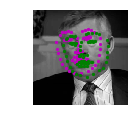

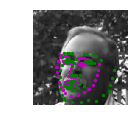

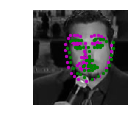

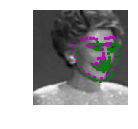

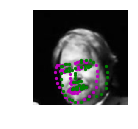

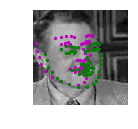

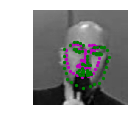

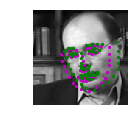

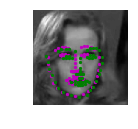

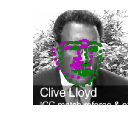

In [24]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [25]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_1_mse_lr0.001_adam.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**:
LOSS FUNCTION:I have tried CrossEntropyLoss and nn.NLLLoss(), but seems it requires LongTensor format and here is folat Tensor format(I really appricate if you can explain a little bit about this formating related stuff), and MSE will give the the larger difference according to the doc which is waht I want to see. 

OPTIMIZATION: 
Adam seems faster and need less tunning and results seems more accuracy, I am not sure about this. But from local run, seems adam is faster. 

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I read some doc online to format my architecture. I haven't tried any other achitecures. I read from some papers that clainmed add 1x1 layer to introduce more nonlinearity, add more convelution, batchnormal layers and drop out layers for avoiding overfitting. Also, add dropout layer to make sure missing info will not affact final result. 

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**:  This is the part I really don't know, just keep trying value.

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.19254203  0.07132585  0.1311236  -0.10323663  0.08002838]
 [ 0.13861319  0.11804826  0.17112701  0.1094715  -0.13640115]
 [ 0.19941388 -0.04779625 -0.16261151 -0.04511132 -0.07774719]
 [ 0.00847936  0.11528037 -0.10082002 -0.10120173  0.13638535]
 [-0.18590473  0.17892233  0.13622583  0.13274117 -0.15501814]]
(5, 5)


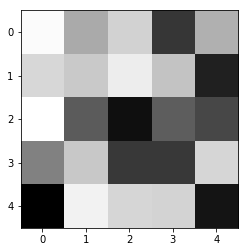

In [26]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

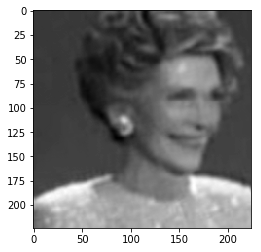

In [27]:
##TODO: load in and display any image from the transformed test dataset
import cv2
image = test_images[i].data.numpy() # c
image = np.transpose(image, (1, 2, 0))  # convert to numpy image

plt.figure(1)
#f , ax = plt.subplots(1 , 2 , figsize = (30,10))
plt.imshow(cv2.filter2D(image, -1, w[0][0]), cmap = 'gray')
## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image


### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: From what I have seen, it just tried to smooth the image to reduce noise

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!